In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('PM_data.csv')

In [3]:
df = df.drop(['Trace CO'], axis=1)

In [4]:
df

,Date,Time,TEMP,PM 2.5
0,6/5/2023,12:00 AM,57.7,4.4
1,6/5/2023,1:00 AM,56.6,3.8
2,6/5/2023,2:00 AM,55.5,4.2
3,6/5/2023,3:00 AM,54.8,4.2
4,6/5/2023,4:00 AM,56.3,4.6
...,...,...,...,...
87,6/8/2023,3:00 PM,66.8,91.2
88,6/8/2023,4:00 PM,66.7,78.5
89,6/8/2023,5:00 PM,66.2,82.2
90,6/8/2023,6:00 PM,66.2,81.0


In [5]:
# Combine Date and Time columns into a single datetime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [6]:
df = df.drop(['Date' , 'Time'], axis=1)

In [7]:
df

,TEMP,PM 2.5,DateTime
0,57.7,4.4,2023-06-05 00:00:00
1,56.6,3.8,2023-06-05 01:00:00
2,55.5,4.2,2023-06-05 02:00:00
3,54.8,4.2,2023-06-05 03:00:00
4,56.3,4.6,2023-06-05 04:00:00
...,...,...,...
87,66.8,91.2,2023-06-08 15:00:00
88,66.7,78.5,2023-06-08 16:00:00
89,66.2,82.2,2023-06-08 17:00:00
90,66.2,81.0,2023-06-08 18:00:00


In [8]:
# rename columns from TEMP to Temperature, etc.

df = df.rename(columns={'TEMP': 'Temperature', 'PM 2.5': 'pm25', 'DateTime': 'DateTime'})

In [9]:
df.dtypes

Temperature           float64
pm25                  float64
DateTime       datetime64[ns]
dtype: object

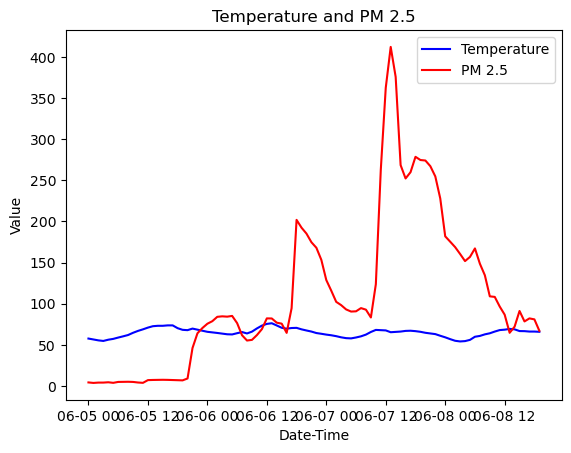

In [10]:


# Plotting the graph
plt.plot(df['DateTime'], df['Temperature'], color='blue', label='Temperature')
plt.plot(df['DateTime'], df['pm25'], color='red', label='PM 2.5')

# Adding labels and title
plt.xlabel('Date-Time')
plt.ylabel('Value')
plt.title('Temperature and PM 2.5')

# Adding legend
plt.legend()

# Displaying the graph
plt.show()


In [11]:

import plotly.graph_objects as go

# Assuming you have a DataFrame named 'df' with 'DateTime', 'Temperature', and 'PM 2.5' columns

# Create the figure and plot the Temperature
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['DateTime'], y=df['Temperature'], mode='lines', name='Temperature'))

# Add the PM 2.5 data to the figure
fig.add_trace(go.Scatter(x=df['DateTime'], y=df['pm25'], mode='lines', name='PM 2.5'))

# Update layout with axis labels and title
fig.update_layout(
    xaxis_title='Date-Time',
    yaxis_title='Value',
    title='Temperature and PM 2.5'
)

# Display the interactive plot
fig.show()


In [12]:


# Assuming you have a DataFrame named 'df' with 'DateTime' and 'PM 2.5' columns

# Create the figure and plot the initial data
fig = go.Figure(
    data=[go.Scatter(x=df['DateTime'], y=df['pm25'], mode='lines', name='PM 2.5')],
    layout=go.Layout(
        xaxis=dict(range=[df['DateTime'].min(), df['DateTime'].max()]),
        yaxis=dict(range=[df['pm25'].min(), df['pm25'].max()]),
        title='PM 2.5 over Time'
    ),
    frames=[go.Frame(data=[go.Scatter(x=df['DateTime'][:i+1], y=df['pm25'][:i+1])]) for i in range(len(df))]
)

# Add animation settings
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='Play', method='animate', args=[None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}])]
        )
    ]
)

# Display the animated plot
fig.show()

#download the animated plot in html format
fig.write_html('animated_plot.html')


In [13]:
# Assuming you have a DataFrame named 'df' with 'DateTime', 'Temperature', and 'pm25' columns

# Create the figure and plot the initial data
fig = go.Figure(
    data=[go.Bar(x=df['DateTime'], y=df['pm25'])],
    layout=go.Layout(
        title='Animated Bar Chart'
    ),
    frames=[go.Frame(data=[go.Bar(x=df['DateTime'][:i+1], y=df['pm25'][:i+1])]) for i in range(len(df))]
)

# Add animation settings
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='Play', method='animate', args=[None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}])]
        )
    ]
)

# Display the animated plot
fig.show()
fig.write_html('animated_plot_bar.html')

In [14]:
import pandas as pd
import plotly.graph_objects as go

# Assuming you have a DataFrame named 'df' with 'DateTime' and 'pm25' columns

# Create the figure and plot the initial data
fig = go.Figure(
    data=[go.Scatter(x=df['DateTime'], y=df['pm25'], mode='lines+markers')],
    layout=go.Layout(
        title='PM 2.5 Animation',
        xaxis=dict(range=[df['DateTime'].min(), df['DateTime'].max()]),
        yaxis=dict(range=[df['pm25'].min(), df['pm25'].max()])
    ),
    frames=[go.Frame(data=[go.Scatter(x=df['DateTime'][:i+1], y=df['pm25'][:i+1], mode='lines+markers')]) for i in range(len(df))]
)

# Add animation settings
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='Play', method='animate', args=[None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}])]
        )
    ]
)

# Display the animated plot
fig.show()
